# 16 DYNAMO

## Notebook setup

In [ ]:
#import sys
#!{sys.executable} -m pip install matplotlib==3.6.3

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dynamo as dyn
import cellrank as cr
import matplotlib

from matplotlib.colors import LinearSegmentedColormap

pd.set_option('display.max_rows', 200)

warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

cr.settings.verbosity = 1

In [2]:
dyn.get_all_dependencies_version()

package umap-learn typing-extensions    tqdm statsmodels setuptools  \
version      0.5.5            4.10.0  4.66.2      0.14.1     68.2.2   

package session-info seaborn   scipy scikit-learn pynndescent pre-commit  \
version        1.0.0  0.13.2  1.11.4        1.1.3      0.5.11      3.6.2   

package pandas openpyxl   numpy numdifftools   numba networkx matplotlib  \
version  2.2.1    3.1.2  1.26.4       0.9.41  0.59.0    3.2.1      3.6.3   

package loompy  igraph get-version dynamo-release colorcet       anndata  
version  3.0.7  0.10.8       3.5.5          1.4.0    3.1.0  0.10.5.post1

In [3]:
dyn.configuration.set_figure_params('dynamo', background='white', vector_friendly=True, transparent=True)

In [4]:
user_defined_cmap_markers = LinearSegmentedColormap.from_list('mycmap', ["#E6E6FF", "#CCCCFF", "#B2B2FF", "#9999FF",  "#6666FF",   "#3333FF", "#0000FF"])
user_defined_cmap_degs = LinearSegmentedColormap.from_list('mycmap', ["#0000FF", "#3333FF", "#6666FF", "#9999FF", "#B2B2FF", "#CCCCFF", "#E6E6FF", "#E6FFE6", "#CCFFCC", "#B2FFB2", "#99FF99", "#66FF66", "#33FF33", "#00FF00"])
user_defined_palette_incmap = LinearSegmentedColormap.from_list('mycmap', [ '#2ED9FF', '#c1c119', '#8b0000', '#FE00FA', "#F8A19F", '#1CBE4F','#B5EFB5',  '#AA0DFE','#FEAF16', '#325A9B', '#C075A6'])


user_defined_palette =  [ '#F6222E', '#FEAF16','#3283FE','#BDCDFF', '#3B00FB', '#F8A19F', '#1CFFCE',  '#C4451C', 
                          '#2ED9FF', '#c1c119', '#8b0000', '#FE00FA', '#1CBE4F','#B5EFB5', '#0e452b', '#AA0DFE']


In [5]:
%matplotlib inline 

# Conventional scRNA-seq

### Load data

In [6]:
path_to_h5ad = '../output/anndata_io/Vid2.h5ad'

In [7]:
adata = dyn.read_h5ad(path_to_h5ad)

In [8]:
preprocessor = dyn.pp.Preprocessor(cell_cycle_score_enable=True)
preprocessor.preprocess_adata(adata, recipe='monocle')

|-----> Running monocle preprocessing pipeline...
|-----------> filtered out 4 outlier cells
|-----------> filtered out 20229 outlier genes
|-----> PCA dimension reduction
|-----> <insert> X_pca to obsm in AnnData Object.
|-----> computing cell phase...
|-----> [Cell Phase Estimation] completed [44.1003s]
|-----> [Cell Cycle Scores Estimation] completed [0.2596s]
|-----> [Preprocessor-monocle] completed [41.1091s]


In [9]:
preprocessor.filter_cells_by_outliers_kwargs = {
    "filter_bool": None,
    "layer": "all",
    "min_expr_genes_s": 300,
    "min_expr_genes_u": 100,
    "min_expr_genes_p": 50,
    "max_expr_genes_s": np.inf,
    "max_expr_genes_u": np.inf,
    "max_expr_genes_p": np.inf,
    "shared_count": None,
}

In [10]:
preprocessor.filter_genes_by_outliers_kwargs = {
    "filter_bool": None,
    "layer": "all",
    "min_cell_s": 3,
    "min_cell_u": 2,
    "min_cell_p": 1,
    "min_avg_exp_s": 0,
    "min_avg_exp_u": 0,
    "min_avg_exp_p": 0,
    "max_avg_exp": np.inf,
    "min_count_s": 5,
    "min_count_u": 0,
    "min_count_p": 0,
    "shared_count": 40,
}

In [11]:
preprocessor.select_genes_kwargs = {
    "n_top_genes": 5000,
    "sort_by": "cv_dispersion",
    "keep_filtered": True,
    "SVRs_kwargs": {
        "relative_expr": True,
        "total_szfactor": "total_Size_Factor",
        "min_expr_cells": 0,
        "min_expr_avg": 0,
        "max_expr_avg": np.inf,
        "winsorize": False,
        "winsor_perc": (1, 99.5),
        "sort_inverse": False,
        "svr_gamma": None,
    },
}

In [12]:
preprocessor.preprocess_adata_monocle(adata )

|-----> Running monocle preprocessing pipeline...
|-----------> filtered out 19 outlier cells
|-----------> filtered out 20581 outlier genes
|-----> PCA dimension reduction
|-----> <insert> X_pca to obsm in AnnData Object.
|-----> computing cell phase...
|-----> [Cell Phase Estimation] completed [37.6596s]
|-----> [Cell Cycle Scores Estimation] completed [0.2131s]
|-----> [Preprocessor-monocle] completed [37.6054s]


In [13]:
dyn.tl.dynamics(adata, model='stochastic', cores=7)

|-----> dynamics_del_2nd_moments_key is None. Using default value from DynamoAdataConfig: dynamics_del_2nd_moments_key=False
|-----------> removing existing M layers:[]...
|-----------> making adata smooth...
|-----> calculating first/second moments...
|-----? layer X_velocity is not in any of the (['X_spliced', 'X_unspliced'], ['X_new', 'X_total'], ['X_uu', 'X_ul', 'X_su', 'X_sl']) groups, skipping...
|-----? layer X_variance_velocity is not in any of the (['X_spliced', 'X_unspliced'], ['X_new', 'X_total'], ['X_uu', 'X_ul', 'X_su', 'X_sl']) groups, skipping...
|-----? layer X_Mu is not in any of the (['X_spliced', 'X_unspliced'], ['X_new', 'X_total'], ['X_uu', 'X_ul', 'X_su', 'X_sl']) groups, skipping...
|-----? layer X_Ms is not in any of the (['X_spliced', 'X_unspliced'], ['X_new', 'X_total'], ['X_uu', 'X_ul', 'X_su', 'X_sl']) groups, skipping...
|-----? layer X_Mu is not in any of the (['X_spliced', 'X_unspliced'], ['X_new', 'X_total'], ['X_uu', 'X_ul', 'X_su', 'X_sl']) groups, ski

AnnData object with n_obs × n_vars = 3768 × 25526
    obs: 'sample', 'stage', 'day', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'original_total_counts', 'log10_original_total_counts', 'mito_frac', 'ribo_frac', 'hb_frac', 'doublet_score', 'predicted_doublet', 'n_counts', 'leiden_0.2', 'leiden_0.4', 'leiden_0.6', 'leiden_0.8', 'leiden_1.0', 'leiden_1.2', 'leiden_1.4', 'leiden_1.6', 'leiden_1.8', 'leiden_2.0', 'leiden_0.1', 'leiden_0.3', 'leiden_0.5', 'leiden_0.7', 'leiden_0.9', 'cell_type', 'cTEC', 'mTEC1', 'mTEC2', 'mTEC3(a)', 'mTEC3(b)', 'mTEC3(c)', 'mTEC4', 'pre-Aire mTEC1', 'pre-Aire mTEC2', 'prol mTEC', 'mat mTEC1', 'mat mTEC2', 'mat mTEC3', 'post-Aire mTEC1', 'post-Aire mTEC2', 'post-Aire mTEC3', 'GP2-pref mTEC', 'tuft-like mTEC', 'unknown TEC', 'fibroblast-like1', 'fibroblast-like2', 'ciliated TEC', 'per_cTEC', 'mat_c

In [14]:
dyn.tl.cell_velocities(adata, method='pearson', use_neg_vals=False, other_kernels_dict={'transform': 'sqrt'})

|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 100.0000%|-----> [calculating transition matrix via pearson kernel with sqrt transform.] completed [4.4925s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [0.2901s]
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected


AnnData object with n_obs × n_vars = 3768 × 25526
    obs: 'sample', 'stage', 'day', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'original_total_counts', 'log10_original_total_counts', 'mito_frac', 'ribo_frac', 'hb_frac', 'doublet_score', 'predicted_doublet', 'n_counts', 'leiden_0.2', 'leiden_0.4', 'leiden_0.6', 'leiden_0.8', 'leiden_1.0', 'leiden_1.2', 'leiden_1.4', 'leiden_1.6', 'leiden_1.8', 'leiden_2.0', 'leiden_0.1', 'leiden_0.3', 'leiden_0.5', 'leiden_0.7', 'leiden_0.9', 'cell_type', 'cTEC', 'mTEC1', 'mTEC2', 'mTEC3(a)', 'mTEC3(b)', 'mTEC3(c)', 'mTEC4', 'pre-Aire mTEC1', 'pre-Aire mTEC2', 'prol mTEC', 'mat mTEC1', 'mat mTEC2', 'mat mTEC3', 'post-Aire mTEC1', 'post-Aire mTEC2', 'post-Aire mTEC3', 'GP2-pref mTEC', 'tuft-like mTEC', 'unknown TEC', 'fibroblast-like1', 'fibroblast-like2', 'ciliated TEC', 'per_cTEC', 'mat_c

## Reconstruct vector field

In [15]:
dyn.vf.VectorField(adata, basis='umap', M=1000, MaxIter=170, pot_curl_div=True)
#dyn.vf.VectorField(adata, basis="umap", pot_curl_div=True)
#dyn.vf.VectorField(adata, basis="pca", pot_curl_div=True)

|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: UMAP. 
        Vector field will be learned in the UMAP space.
|-----> Generating high dimensional grids and convert into a row matrix.
|-----> Learning vector field with method: sparsevfc.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> [SparseVFC] completed [110.2847s]
|-----------> current cosine correlation between input velocities and learned velocities is less than 0.6. Make a 1-th vector field reconstruction trial.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> [SparseVFC] completed [108.7033s]
|-----------> current cosine correlation between input velocities and learned velocities is less than 0.6. Make a 2-th vector field reconstruction trial.
|-----> [SparseVFC] begins...
|-----

Calculating 2-D curl: 100%|██████████| 3768/3768 [00:00<00:00, 25676.83it/s]

|-----> Computing divergence...



Calculating divergence: 100%|██████████| 4/4 [00:00<00:00, 29.94it/s]


|-----> [VectorField] completed [593.6313s]


## Characterize vector field topology

In [16]:
dyn.configuration.set_figure_params('dynamo', figsize=(6, 4), dpi=80, dpi_save=300, background='white', vector_friendly=True, transparent=True)

|-----> Vector field for umap is but its topography is not mapped. Mapping topography now ...
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----------> plotting with basis key=X_umap
|-----------> skip filtering cell_type_subset by stack threshold when stacking color because it is not a numeric type


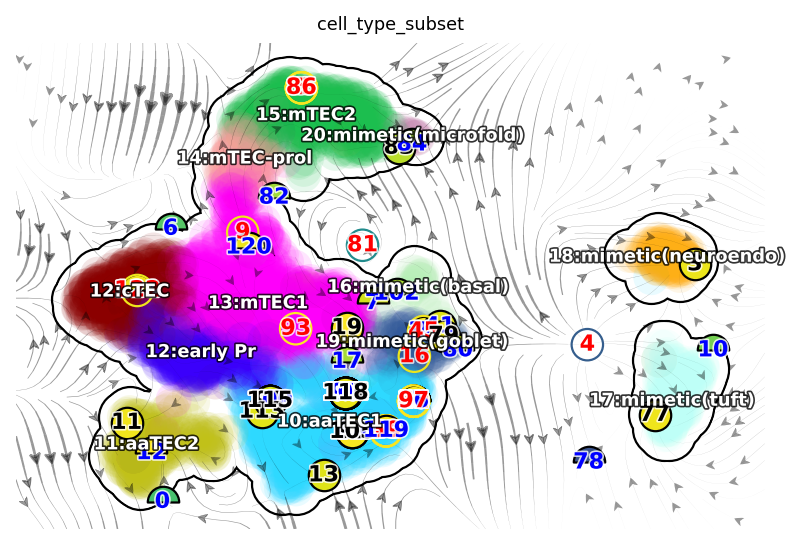

In [17]:
ax = dyn.pl.topography(adata, basis='umap', background='white', color=['cell_type_subset'], cmap='Spectral_r', color_key=['#2ED9FF', '#c1c119',  '#8b0000','#3b00fb', '#FE00FA', "#F8A19F", '#1CBE4F','#B5EFB5', '#BEFFF7' ,'#FEAF16', '#325A9B', '#C075A6'], streamline_color='black', save_show_or_return='return', show_legend='on data', frontier=True)

plt.show()

## Beyond RNA velocity

Using existing pearson_transition_matrix found in .obsp.
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [0.2768s]
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: PCA. 
        Vector field will be learned in the PCA space.
|-----> Learning vector field with method: sparsevfc.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> [SparseVFC] completed [3.2562s]
|-----> [VectorField] completed [3.3297s]


Calculating divergence: 100%|█████████████████████| 4/4 [00:00<00:00, 23.40it/s]


|-----> [Calculating acceleration] in progress: 100.0000%|-----> [Calculating acceleration] completed [0.1082s]
|-----> [Calculating acceleration] in progress: 100.0000%|-----> [Calculating acceleration] completed [0.0938s]
|-----> [Calculating curvature] in progress: 100.0000%|-----> [Calculating curvature] completed [0.0703s]


|-----------> plotting with basis key=X_umap
|-----------> plotting with basis key=X_umap
|-----------> skip filtering cell_type_subset by stack threshold when stacking color because it is not a numeric type


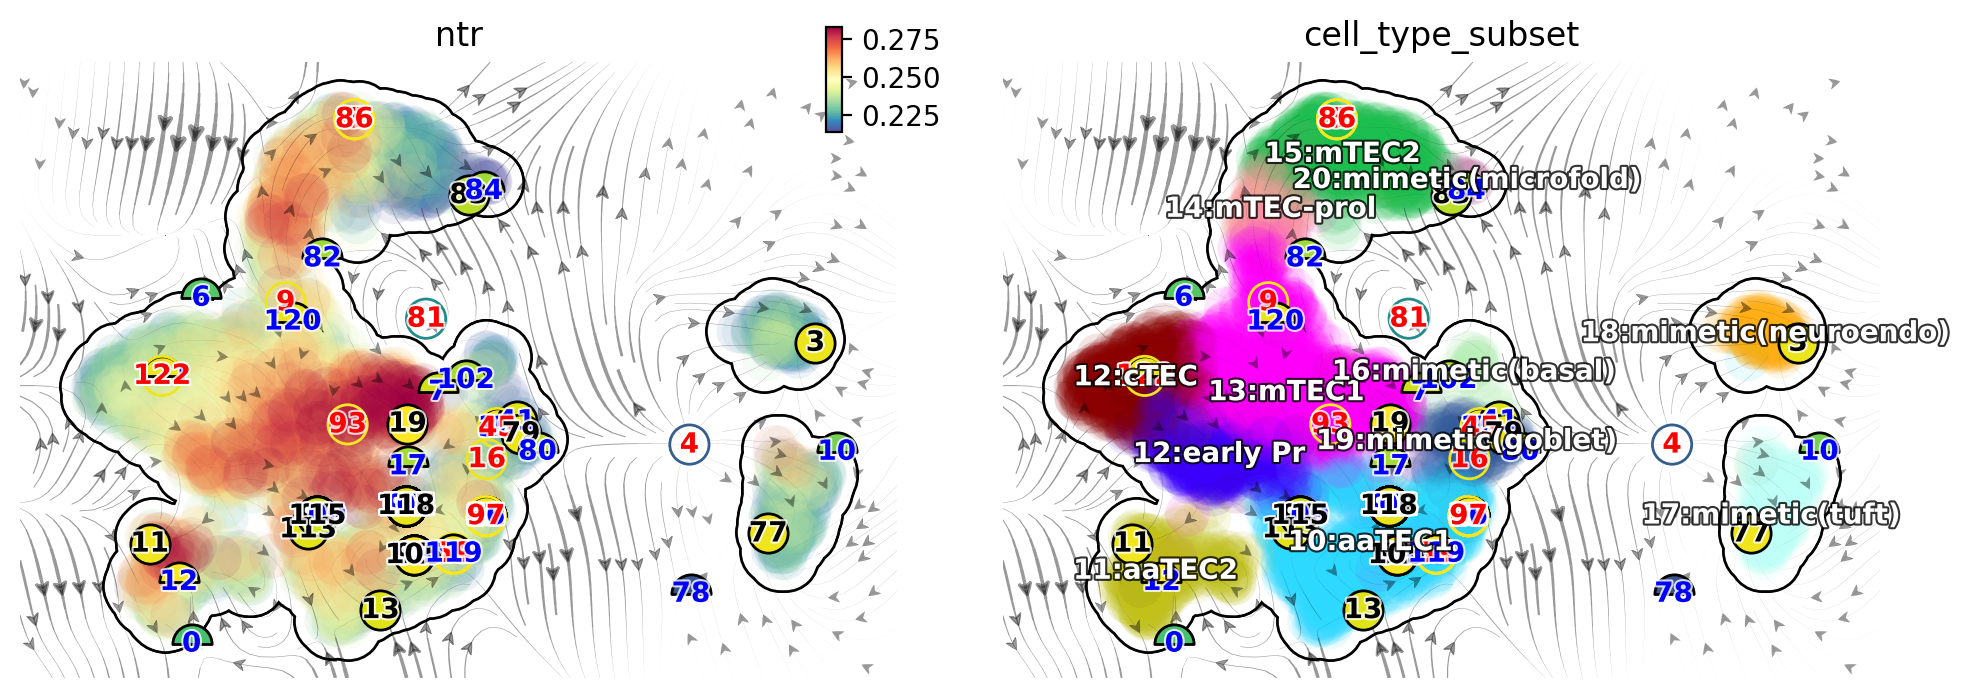

In [ ]:
dyn.pl.topography(adata, basis='umap', background='white', color=['ntr', 'cell_type_subset'], cmap='Spectral_r', color_key=['#2ED9FF', '#c1c119',  '#8b0000','#3b00fb', '#FE00FA', "#F8A19F", '#1CBE4F','#B5EFB5', '#BEFFF7' ,'#FEAF16', '#325A9B', '#C075A6'],  streamline_color='black', show_legend='on data', frontier=True)

In [18]:
dyn.configuration.set_figure_params('dynamo', figsize=(6, 4), dpi=80,  fontsize=16, dpi_save=300, background='white', vector_friendly=True, transparent=True)

|-----------> plotting with basis key=X_umap
|-----------> skip filtering cell_type_subset by stack threshold when stacking color because it is not a numeric type


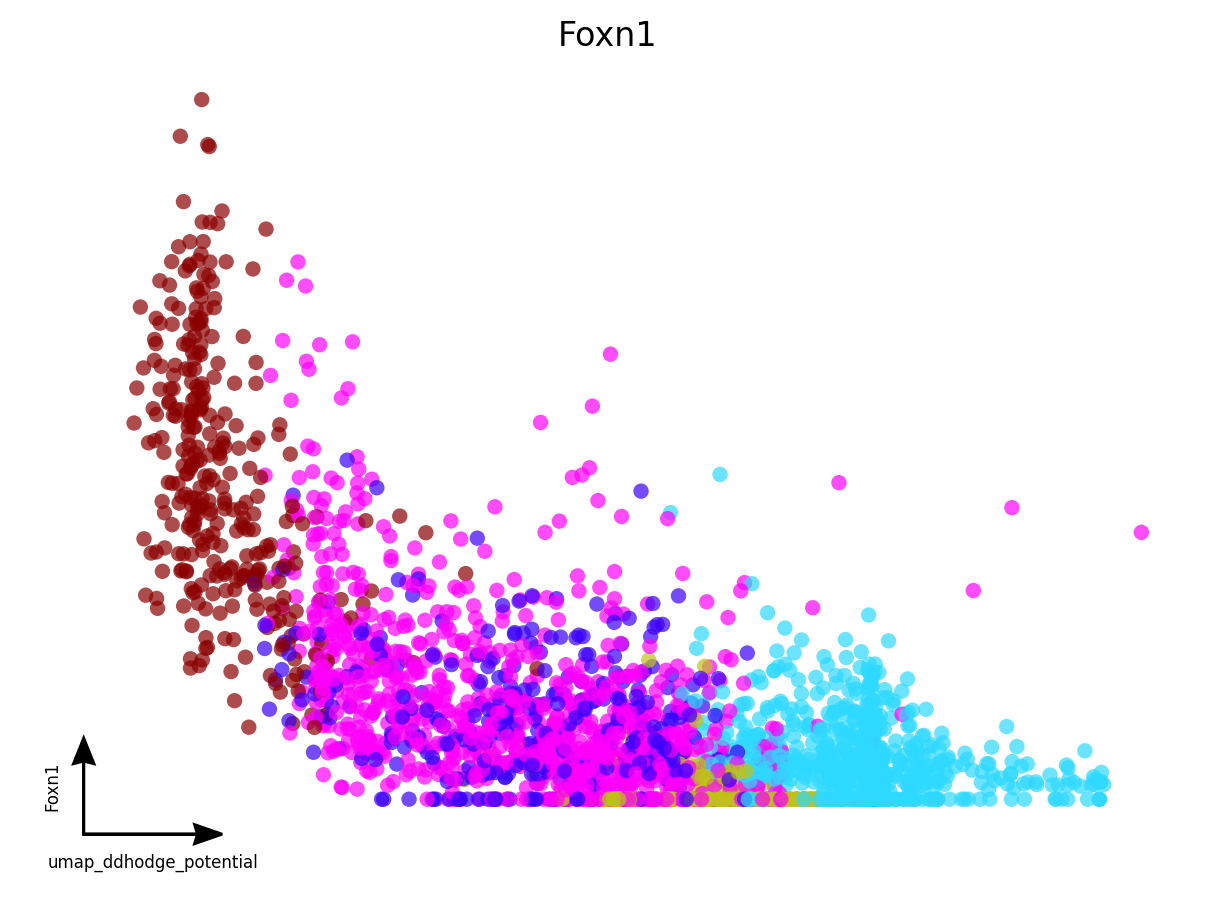

In [20]:
import numpy as np


dyn.pl.scatters(adata[(adata.obs['cell_type_subset']=='10:aaTEC1') |
                     (adata.obs['cell_type_subset']=='11:aaTEC2') |
                     (adata.obs['cell_type_subset']=='12:early Pr') |
                     (adata.obs['cell_type_subset']=='13:mTEC1') |
                     (adata.obs['cell_type_subset']=='12:cTEC')], x=np.repeat('umap_ddhodge_potential', 1), pointsize=0.1, alpha=0.7, y='Foxn1', layer='X_spliced', color='cell_type_subset', show_legend=False,
                ncols=1,  color_key=['#2ED9FF', '#c1c119',  '#8b0000','#3b00fb', '#FE00FA', "#F8A19F", '#1CBE4F','#B5EFB5', '#BEFFF7' ,'#FEAF16', '#325A9B', '#C075A6'], figsize=(4, 3),
               show_arrowed_spines=True, save_show_or_return='show', save_kwargs= {"dpi": 300, "ext": 'svg'})


In [21]:
user_defined_cmap_perturb = LinearSegmentedColormap.from_list('mycmap', ["#B2B2FF", "#CCCCFF", "#E6E6FF", "#E6FFE6", "#CCFFCC", "#B2FFB2", "#99FF99", "#66FF66", "#33FF33", "#00FF00"])

In [22]:
gene = 'Foxn1'

|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----------> plotting with basis key=X_umap


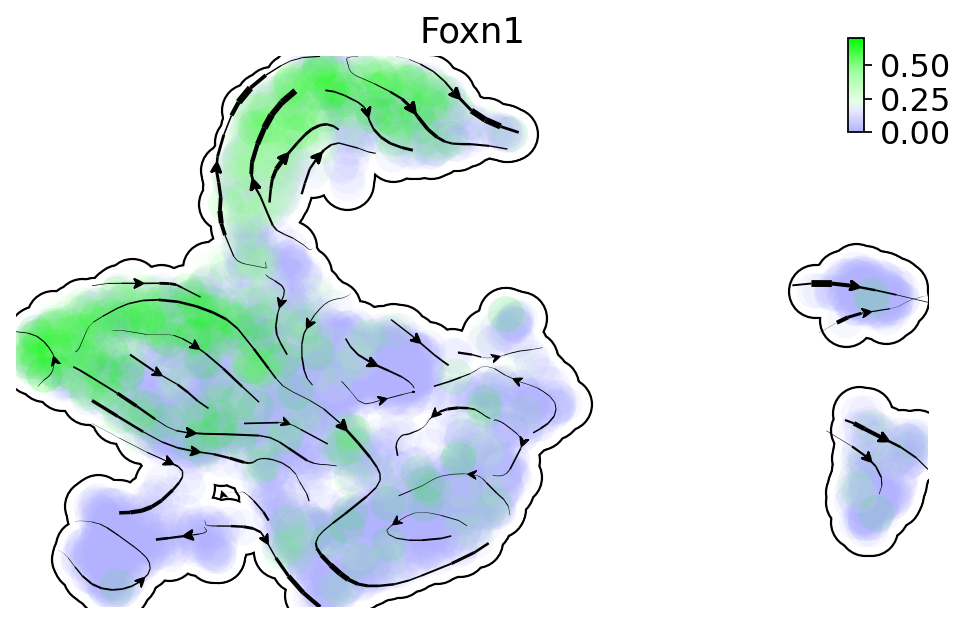

In [23]:
dyn.configuration.set_figure_params('dynamo', figsize=(6, 4), dpi=80,  fontsize=16, dpi_save=300, background='white', vector_friendly=True, transparent=True)
dyn.pl.streamline_plot(adata, color=[gene], cmap=user_defined_cmap_perturb, basis="umap",  show_legend=False,  density=0.425, frontier=True, linewidth=2, sort=True, ncols=3, color_key=['#2ED9FF', '#c1c119',  '#8b0000','#3b00fb', '#FE00FA', "#F8A19F", '#1CBE4F','#B5EFB5', '#BEFFF7' ,'#FEAF16', '#325A9B', '#C075A6'],  save_show_or_return='show', save_kwargs= {"dpi": 300, "ext": 'svg'} )

|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----------> plotting with basis key=X_umap


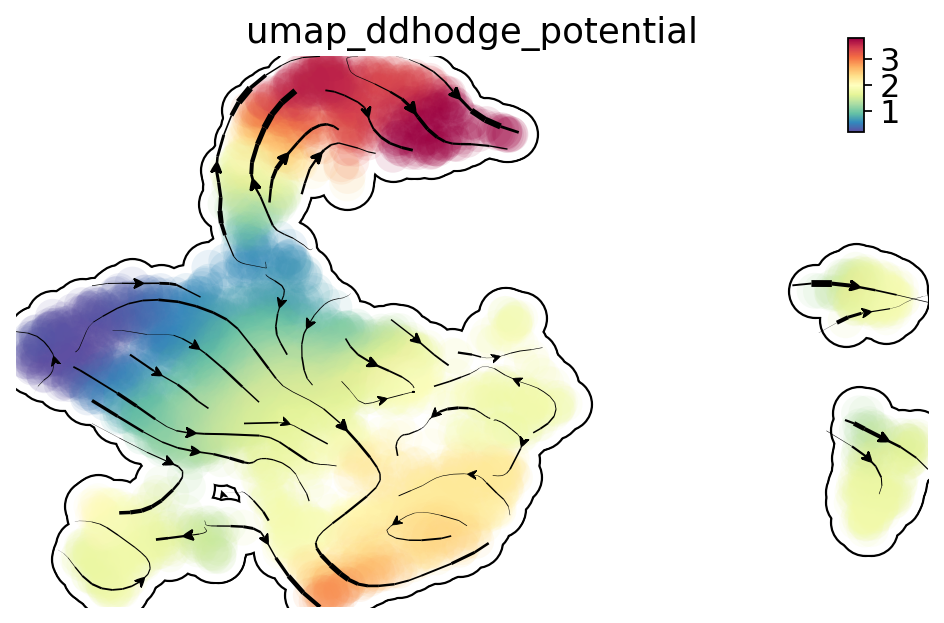

In [24]:
dyn.configuration.set_figure_params('dynamo', figsize=(6, 4), dpi=80,  fontsize=16, dpi_save=300, background='white', vector_friendly=True, transparent=True)
dyn.pl.streamline_plot(adata, color=["umap_ddhodge_potential"], cmap='Spectral_r',   basis="umap", show_legend=False,  density=0.425, frontier=True, linewidth=2, sort=True, ncols=3,  save_show_or_return='show', save_kwargs= {"dpi": 300, "ext": 'svg'} )

In [25]:
import numpy

def patch_asscalar(a):
    return a.item()

setattr(numpy, "asscalar", patch_asscalar)


In [28]:
dyn.tl.cell_velocities(adata, basis='pca')
dyn.vf.VectorField(adata, basis='pca')
#dyn.vf.speed(adata, basis='pca')
#dyn.vf.curl(adata, basis='umap')
#dyn.vf.divergence(adata, basis='pca')
#dyn.vf.acceleration(adata, basis='pca')
#dyn.vf.curvature(adata, basis='pca')


Using existing pearson_transition_matrix found in .obsp.
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [0.2799s]
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: PCA. 
        Vector field will be learned in the PCA space.
|-----> Learning vector field with method: sparsevfc.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> [SparseVFC] completed [3.6297s]
|-----> [VectorField] completed [3.7021s]


calculating Jacobian for each cell: 100%|██████████| 3768/3768 [00:00<00:00, 505651.49it/s]


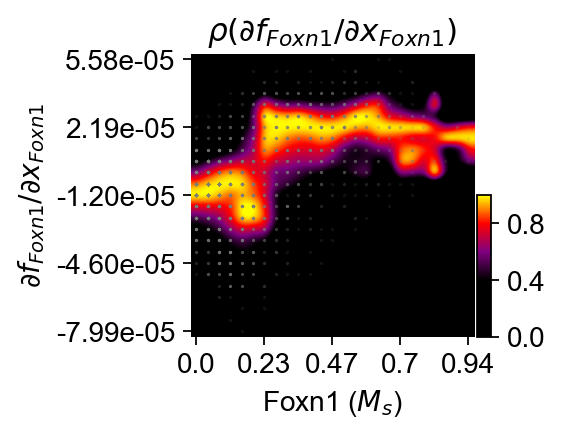

In [29]:
dyn.configuration.set_figure_params('dynamo', figsize=(6, 4), dpi=80,  fontsize=14, dpi_save=300, background='white', vector_friendly=True, transparent=True)

dyn.vf.jacobian(adata, regulators=["Foxn1"], effectors=["Foxn1"])
dyn.pl.response(
    adata,
    np.array([ ["Foxn1", "Foxn1"]]),
    ykey="jacobian",
    log=False,
    drop_zero_cells=True,
    grid_num=25,
    figsize=(5, 3),
    save_show_or_return='show', 
    save_kwargs= {"dpi": 300, "ext": 'pdf'})


### Perturbation

|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----------> plotting with basis key=X_umap
|-----------> skip filtering cell_type_subset by stack threshold when stacking color because it is not a numeric type


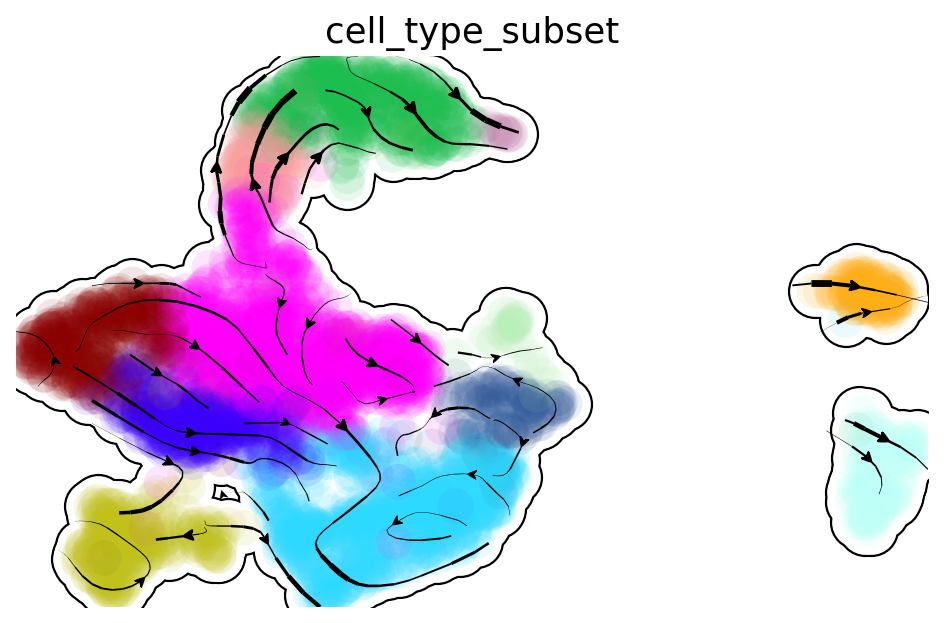

In [30]:
dyn.configuration.set_figure_params('dynamo', figsize=(6, 4), dpi=80,  fontsize=16, dpi_save=300, background='white', vector_friendly=True, transparent=True)
dyn.pl.streamline_plot(adata, color=['cell_type_subset'], basis="umap", show_legend=False,  density=0.425, frontier=True, cmap=user_defined_cmap_perturb, linewidth=2, sort=True, ncols=3, color_key=['#2ED9FF', '#c1c119',  '#8b0000','#3b00fb', '#FE00FA', "#F8A19F", '#1CBE4F','#B5EFB5', '#BEFFF7' ,'#FEAF16', '#325A9B', '#C075A6'],  save_show_or_return='show', save_kwargs= {"dpi": 300, "ext": 'svg'} )

### Foxn1 inhibition

In [31]:
dyn.pd.perturbation(adata, gene, [-100], emb_basis="umap")

|-----> In silico perturbation of single-cells and prediction of cell fate after perturbation...
|-----> Retrive X_pca, PCs, pca_mean...
|-----> Calculate perturbation effect matrix via \delta Y = J \dot \delta X....
|-----> project the pca perturbation vector to low dimensional space....
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [0.2860s]
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> you can use dyn.pl.streamline_plot(adata, basis='umap_perturbation') to visualize the perturbation vector


|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----------> plotting with basis key=X_umap_perturbation
|-----------> skip filtering cell_type_subset by stack threshold when stacking color because it is not a numeric type


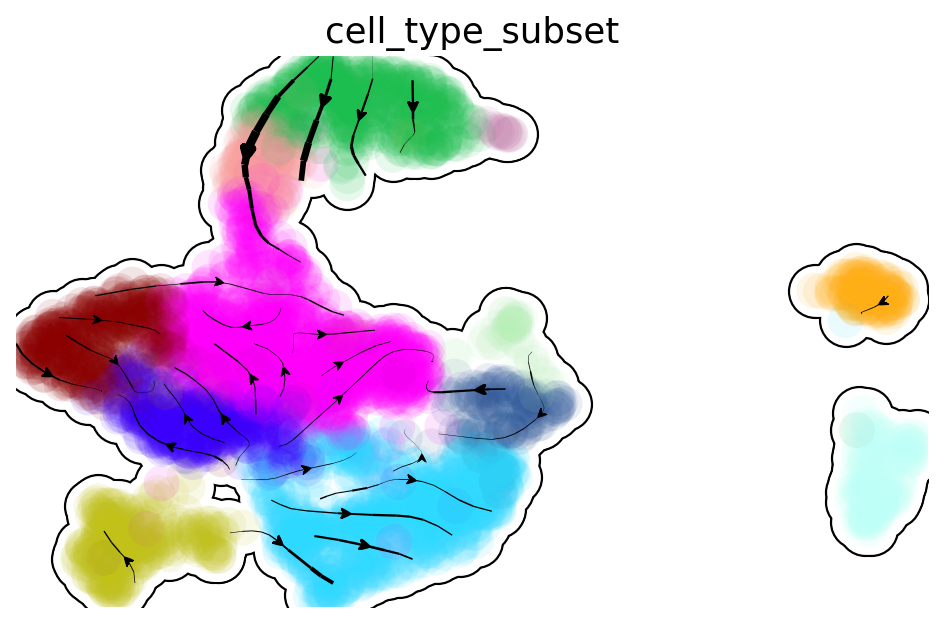

In [32]:
dyn.configuration.set_figure_params('dynamo', figsize=(6, 4), dpi=80,  fontsize=16, dpi_save=300, background='white', vector_friendly=True, transparent=True)
dyn.pl.streamline_plot(adata, color=['cell_type_subset'], basis="umap_perturbation", show_legend=False,  density=0.4, frontier=True, cmap=user_defined_cmap_perturb, linewidth=2, sort=True, ncols=3, color_key=['#2ED9FF', '#c1c119',  '#8b0000','#3b00fb', '#FE00FA', "#F8A19F", '#1CBE4F','#B5EFB5', '#BEFFF7' ,'#FEAF16', '#325A9B', '#C075A6'],  save_show_or_return='show', save_kwargs= {"dpi": 300, "ext": 'svg'} )

### Foxn1 induction

In [33]:
dyn.pd.perturbation(adata, gene, [+100], emb_basis="umap")

|-----> In silico perturbation of single-cells and prediction of cell fate after perturbation...
|-----> Retrive X_pca, PCs, pca_mean...
|-----> Calculate perturbation effect matrix via \delta Y = J \dot \delta X....
|-----> project the pca perturbation vector to low dimensional space....
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [0.2925s]
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> you can use dyn.pl.streamline_plot(adata, basis='umap_perturbation') to visualize the perturbation vector


|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----------> plotting with basis key=X_umap_perturbation
|-----------> skip filtering cell_type_subset by stack threshold when stacking color because it is not a numeric type


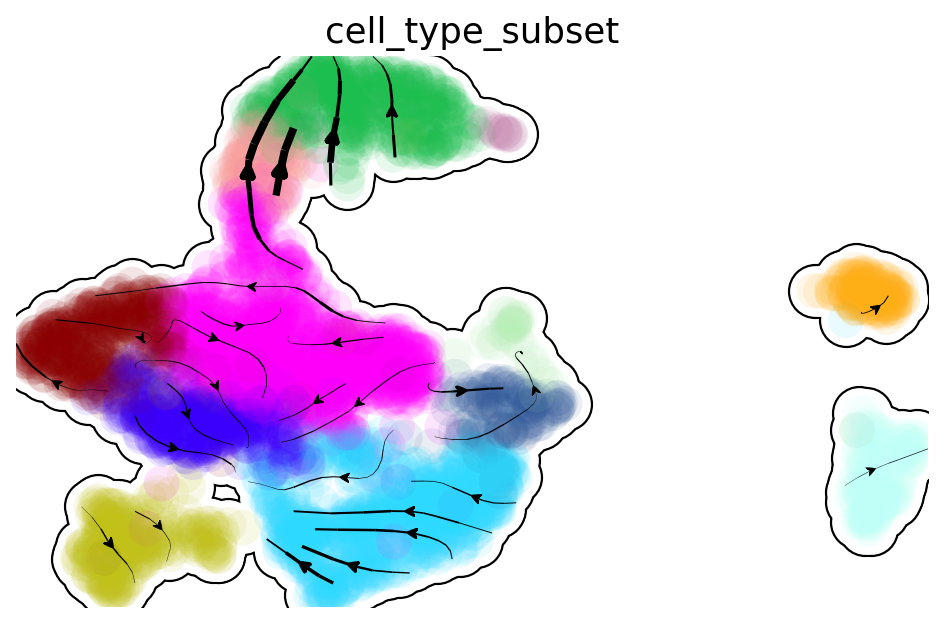

In [34]:
dyn.configuration.set_figure_params('dynamo', figsize=(6, 4), dpi=80,  fontsize=16, dpi_save=300, background='white', vector_friendly=True, transparent=True)
dyn.pl.streamline_plot(adata, color=['cell_type_subset'], basis="umap_perturbation", show_legend=False,  density=0.4, frontier=True, cmap=user_defined_cmap_perturb, linewidth=2, sort=True, ncols=3, color_key=['#2ED9FF', '#c1c119',  '#8b0000','#3b00fb', '#FE00FA', "#F8A19F", '#1CBE4F','#B5EFB5', '#BEFFF7' ,'#FEAF16', '#325A9B', '#C075A6'],  save_show_or_return='show', save_kwargs= {"dpi": 300, "ext": 'svg'} )